INTRODUCTION TO REGRESSION WITH NEURAL NETWORKS IN TENSERFLOW

There are many definitions for a regression problem but in our case, we're going to simplify it: 
predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [90]:
import tensorflow as tf
print(tf.__version__)

2.7.0


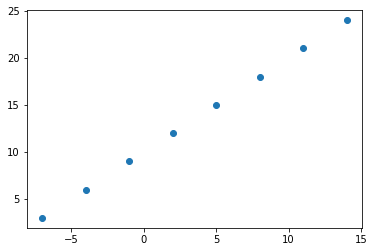

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
Y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [92]:
# Relationships
X + 10, Y == X + 10

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>)

In [93]:
# Input and output shapes
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"]) # input shapes *3*
house_price = tf.constant([939700]) # price of the house (approximate) # output shapes *1*
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [94]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

### STEPS IN MODELLING

1. **Creating a model** - define the input and output layers, as well
as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words,
the function which tells our model how wrong it is) and the optimizer (tells
our model how to improve the patterns its learning) and evaluation metrics
(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between x & y

In [95]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=150) # if we change epochs to 100

Epoch 1/150
1/1 [==============================] - 0s 296ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/150
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/150
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/150
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/150
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/150
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/150
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/150
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/150
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/150
1/1 [==============================] - 0s 10ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/150
1/1 [==============================] - 0s 8

In [96]:
y_pred = model.predict([17.0])
y_pred, y_pred + 11

(array([[30.533512]], dtype=float32), array([[41.533512]], dtype=float32))

### IMPROVING A MODEL 

We can improve our model by altering the steps we took to create a model.

1. **Create a model** - here we might add more layers, increase
the number of hidden units (all called neurons) within
each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or
perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs or on
more data (give the model more examples to learn from) 

In [97]:
# 1. Let's rebuild our model (specified to our problem)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100, verbose=0), model.predict([17.0])

(<keras.callbacks.History at 0x7f35b5e7d2d0>,
 array([[26.434414]], dtype=float32))

### EVALUATING OUR MODEL
In practice, a typical workflow you'll go through when bulding neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to viualize:
* The data - what data are we working with? What does it look
like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it
learns?
* The predictions of the model - how do the predictions of a model
line up against the ground truth (the original labels)?

In [98]:
# Make a bigger dataset
x = tf.range(-100, 160, 4) # increase by 4
x

<tf.Tensor: shape=(65,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96,  100,  104,  108,  112,  116,
        120,  124,  128,  132,  136,  140,  144,  148,  152,  156],
      dtype=int32)>

In [99]:
# Make labels for the dataset (pattern we want AI to learn)
y = x + 10
y


<tf.Tensor: shape=(65,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110, 114,
       118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 162, 166],
      dtype=int32)>

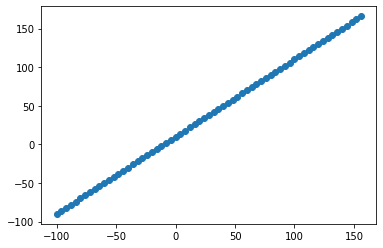

In [100]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

The 3 sets:

**Training set** - the model learns from this data, which is 
typically 70-80% of the total data you have available. (**Course materials**)

**Validation set** - the model gets tuned on this data, which is
typically 10-15% of the data available. (**Practice exam**)

**Test set** - the model gets evaluated on this data to test 
what is has learned, this set is typically 10-15% of the total data available. (**Final exam**)

In [101]:
# Check the length of how many samples we have
len(x)

65

In [102]:
# Split the data into train and test sets
x_train = x[:52] # first 40 training samples (80% of the data)
y_train = y[:52]

x_test = x[52:] # last 10 testing samples (20% of the data)
y_test = y[52:]

len(x_train), len(x_test), len(y_train), len(y_test)

(52, 13, 52, 13)

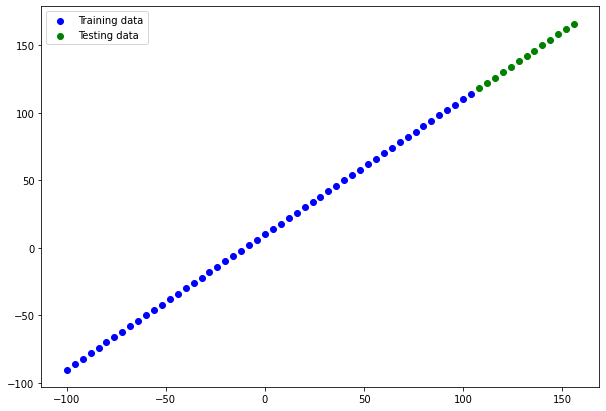

In [103]:
# Visualizing the data
plt.figure(figsize=(10, 7))
# Training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") # "b" - blue
# Test data in gree
plt.scatter(x_test, y_test, c="g", label="Testing data") # "g" - green
# Show a legend
plt.legend();

In [104]:
x[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [105]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(15, input_shape=[1], name="input_layer", activation=None), # cause we are passing 1 number to predict 1 number
  tf.keras.layers.Dense(1, name="output_layer")  
], name="Model1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=600, verbose=0)

In [106]:
# Visualizing the model
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model (X, Y)
* Trainable parameters - these are the patterns the model
can update as it trains
* Non-trainable params - they aren't updated during training
(this is typical when you bring in already learn patters or parameters
from other models during **transfer learning**)

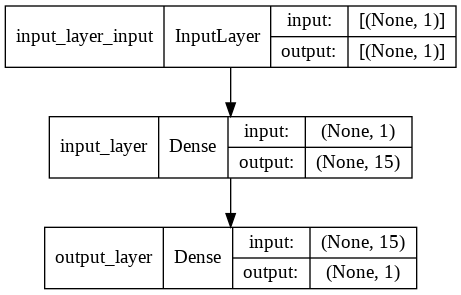

In [107]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [108]:
# Visualize our model's predictions
y_pred = model.predict(x_test)
y_pred, y_test, model.predict([160])

(array([[118.12438],
        [122.12906],
        [126.13373],
        [130.13841],
        [134.14307],
        [138.14774],
        [142.15244],
        [146.1571 ],
        [150.16176],
        [154.16646],
        [158.17113],
        [162.1758 ],
        [166.18048]], dtype=float32),
 <tf.Tensor: shape=(13,), dtype=int32, numpy=
 array([118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 162, 166],
       dtype=int32)>,
 array([[170.18515]], dtype=float32))

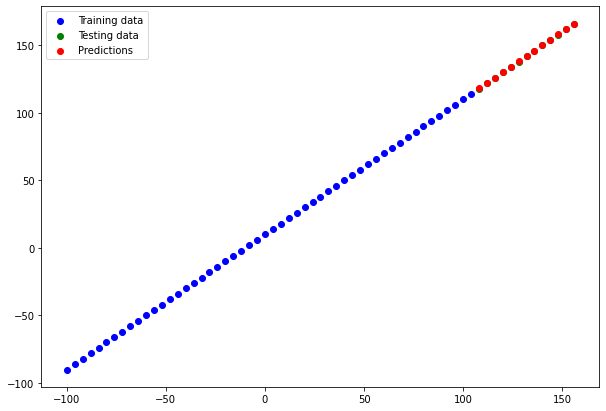

In [109]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

plot_predictions()

In [110]:
# Evaluating a model (regression evaluation metrics)
# Two main metrics: MAE, MSE - MEAN SQUARE ERROR (SQUARE THE AVERAGE ERRORS)
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 108ms/step - loss: 0.1524 - mse: 0.0235


[0.1524270921945572, 0.02353990264236927]

In [111]:
y_pred, y_test

(array([[118.12438],
        [122.12906],
        [126.13373],
        [130.13841],
        [134.14307],
        [138.14774],
        [142.15244],
        [146.1571 ],
        [150.16176],
        [154.16646],
        [158.17113],
        [162.1758 ],
        [166.18048]], dtype=float32),
 <tf.Tensor: shape=(13,), dtype=int32, numpy=
 array([118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 162, 166],
       dtype=int32)>)

In [112]:
tf.constant(y_pred), tf.squeeze(y_pred) # I've cut 1d

(<tf.Tensor: shape=(13, 1), dtype=float32, numpy=
 array([[118.12438],
        [122.12906],
        [126.13373],
        [130.13841],
        [134.14307],
        [138.14774],
        [142.15244],
        [146.1571 ],
        [150.16176],
        [154.16646],
        [158.17113],
        [162.1758 ],
        [166.18048]], dtype=float32)>,
 <tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([118.12438, 122.12906, 126.13373, 130.13841, 134.14307, 138.14774,
        142.15244, 146.1571 , 150.16176, 154.16646, 158.17113, 162.1758 ,
        166.18048], dtype=float32)>)

In [113]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                               y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.1524265>

In [114]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.02353976>

In [115]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)

### MODELING EXPERIMENTS TO IMROVE OUR MODEL

1. Get more data - get more examples for your model to train on
(more opportunities to learn patterns between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original, 1 layer, but trained 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [116]:
x_train, y_train

(<tf.Tensor: shape=(52,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96,  100,  104], dtype=int32)>,
 <tf.Tensor: shape=(52,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110, 114],
       dtype=int32)>)

In [117]:
# MODEL_1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

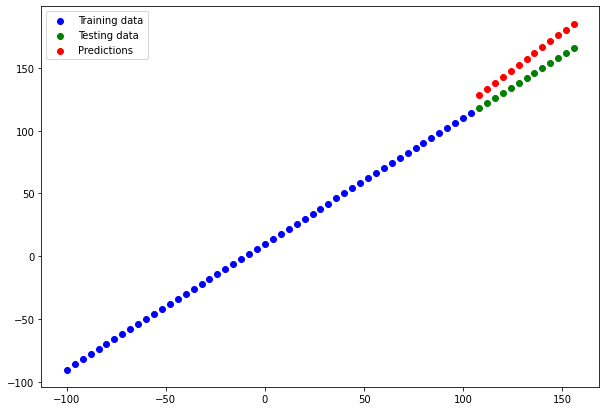

In [118]:
# Make and plot predictions for Model_1
y_preds1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds1)

In [119]:
mae_1 = mae(y_test, tf.squeeze(y_preds1))
mse_1 = mse(y_test, tf.squeeze(y_preds1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.843711>,
 <tf.Tensor: shape=(), dtype=float32, numpy=227.4378>)

In [120]:
# MODEL_2
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)  
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)
                

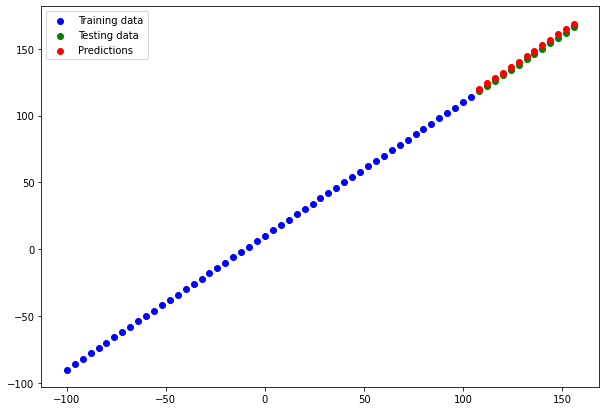

In [121]:
# Make and plot predictions for Model_1
y_preds2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds2)

In [122]:
mae_2 = mae(y_test, tf.squeeze(y_preds2))
mse_2 = mse(y_test, tf.squeeze(y_preds2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3824422>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.7438965>)

In [123]:
# MODEL_3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

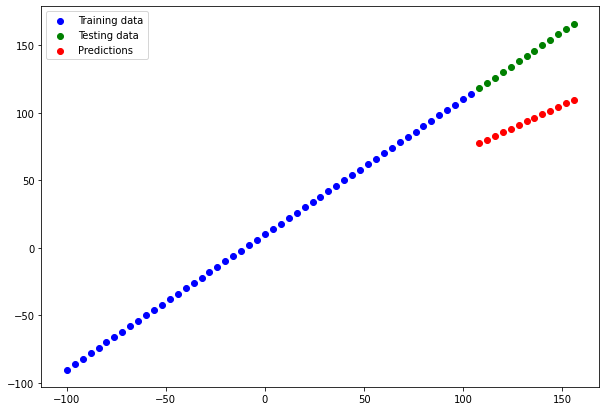

In [124]:
# Make and plot predictions for Model_1
y_preds3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds3)

In [125]:
mae_3 = mae(y_test, tf.squeeze(y_preds3))
mse_3 = mse(y_test, tf.squeeze(y_preds3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=48.443726>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2371.351>)

In [126]:
# COMPARING RESULTS
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.843711,227.437805
1,model_2,2.382442,5.743896
2,model_3,48.443726,2371.351074


In [127]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                20        
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### SAVING OUR MODEL

**Saving our model** allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are 2 main formats we can save our model:

1. **The SavedModel** format
2. **The HDF5** format

In [128]:
# Save a model using "SavedModel" format (INSIDE THE TENSORFLOW IS BETTER TO USE)
model_2.save("most_accurate_model_2_SavedModel_format")

INFO:tensorflow:Assets written to: most_accurate_model_2_SavedModel_format/assets


In [129]:
# Save a model using "HDF5" format (OUTSIDE OF TENSORFLOW IS BETTER TO USE)
model_2.save("most_accurate_model_2_HDF5_format.h5")

In [130]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("most_accurate_model_2_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                20        
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [132]:
mae(y_true=y_test, y_pred = model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(13,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])>

In [133]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("most_accurate_model_2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                20        
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compare model_2 predictions with .h5 format model predictions
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### PREPARING A DATASET

In [135]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance # charges - dependent var = charges (number we want to predict)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [137]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [138]:
# Create X & Y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]

In [139]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [140]:
# View Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [141]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # test size is 20% 
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [142]:
# Build a neural network
tf.random.set_seed(42)

model_insurance = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_insurance.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

model_insurance.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

In [143]:
# Check the results of the insurance model on the test data
model_insurance.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8921.8213 - mae: 8921.8213


[8921.8212890625, 8921.8212890625]

In [144]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364489)

In [145]:
# Let's improve our insurance_model
tf.random.set_seed(42)

model_insurance_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_insurance_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

model_insurance_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

In [146]:
# Evaluate insurance_model_2
model_insurance_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.9424 - mae: 8627.9424


[8627.9423828125, 8627.9423828125]

In [147]:
model_insurance_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

In [148]:
# Evaluate insurance_model_2
model_insurance_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.7393 - mae: 8627.7393


[8627.7392578125, 8627.7392578125]

In [149]:
# Compare insurance_model_1 MAE to model_2
model_insurance.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8921.8213 - mae: 8921.8213


[8921.8212890625, 8921.8212890625]

In [150]:
tf.random.set_seed(42)

model_insurance_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_insurance_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
                          metrics=["mae"])

history = model_insurance_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

In [151]:
# Evaluate our model_3
model_insurance_3.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8634.9307 - mae: 8634.9307


[8634.9306640625, 8634.9306640625]

Text(0.5, 0, 'epochs')

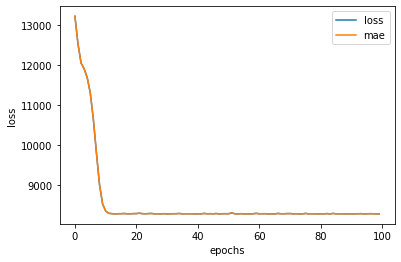

In [152]:
# Plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [154]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preprocessing Data (Normalization and Standartization)

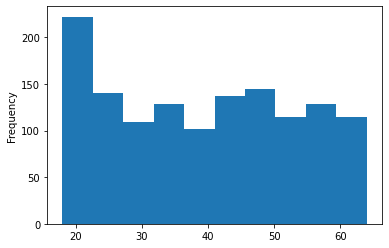

In [155]:
X["age"].plot(kind="hist")

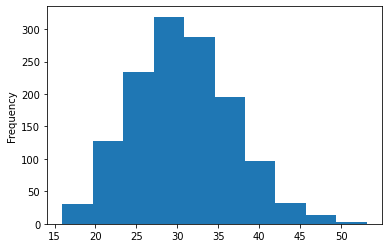

In [156]:
X["bmi"].plot(kind="hist")

In [157]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [158]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [159]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [160]:
# Normalized and one-hot encoded example
X_train_normal[0], X_train_normal[76]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 array([0.        , 0.38081786, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]))

In [161]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network for it

In [200]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=1000),
                          metrics=['mae'])

history = insurance_model_3.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 328469250048.0000 - mae: 328469250048.0000
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 25907116032.0000 - mae: 25907116032.0000
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 1116258304.0000 - mae: 1116258304.0000
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 135349344.0000 - mae: 135349344.0000
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 16651059.0000 - mae: 16651059.0000
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 6139614.5000 - mae: 6139614.5000
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 2011632.2500 - mae: 2011632.2500
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 454790.7500 - mae: 454790.7500
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 311933.9062 - mae: 311933.9062
Epoch 10/500
34/34 [

In [201]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8662.2100 - mae: 8662.2100


[8662.2099609375, 8662.2099609375]

Text(0.5, 0, 'epochs')

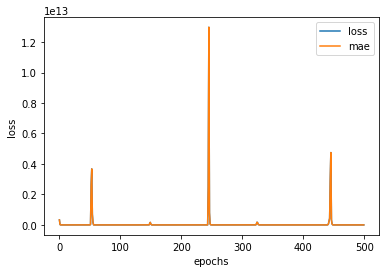

In [202]:
# Plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")